## 1. Fourier filtering and smoothing

### (a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
url = "D:/HKUST—ddm/5004/hw/ass4/HK_Meteorological_Data_Daily_1884-2021.csv"

In [3]:
Mete = pd.read_csv(url)

In [4]:
Mete.head(4)

,Year,Month,Day,Mean Pressure (hPa),Absolute Daily Max (deg. C),Mean (deg. C),Absolute Daily Min (deg. C),Mean Dew Point (deg. C),Mean Relative Humidity (%),Mean Amount of Cloud (%),Total Rainfall (mm),Total Bright Sunshine (hours),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h)
0,1884,1,1,***,15.3,***,13.7,***,***,***,Trace,***,***,***
1,1884,1,2,***,17.1,***,14.6,***,***,***,Trace,***,***,***
2,1884,1,3,***,19.6,***,16.2,***,***,***,0,***,***,***
3,1884,1,4,***,23.2,***,17.0,***,***,***,0,***,***,***


In [5]:
Max = Mete["Absolute Daily Max (deg. C)"]
Min = Mete["Absolute Daily Min (deg. C)"]
Mean_deg = np.array((Max+Min)/2)
time = np.array(Mete.Year.astype('str')+"/"+Mete.Month.astype('str')+"/"+Mete.Day.astype('str'))

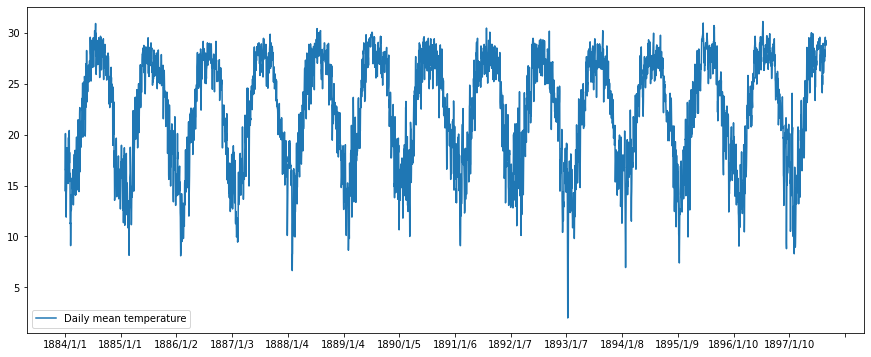

In [6]:
fig,ax = plt.subplots(1,1,figsize = (15,6))
tick_spacing = 366
ax.plot(time[:5000],Mean_deg[:5000],label = "Daily mean temperature")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.legend()
plt.show()

**From the graph above, we can find that the mean temperature has fluctuated on a regular cycle. The period is about one year($365$ days)**

### (b)

In [7]:
from scipy.fft import fft,ifft

In [8]:
real = fft(Mean_deg).real
imag = fft(Mean_deg).imag

In [9]:
magnit_sqr = real**2+imag**2
freq = np.arange(len(Mean_deg))

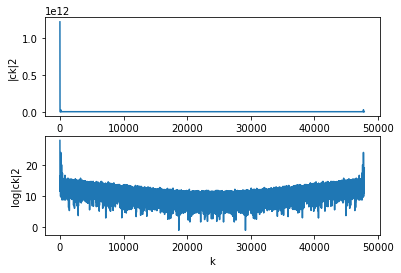

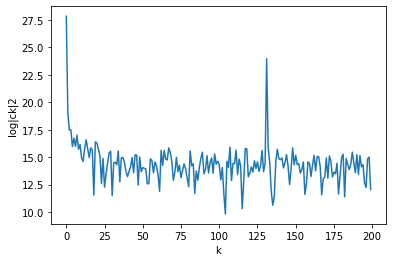

In [10]:
fig,ax = plt.subplots(2,1)
ax[0].plot(freq,magnit_sqr)
ax[1].plot(freq,np.log(magnit_sqr))
ax[0].set_xlabel("k")
ax[0].set_ylabel("|ck|2")
ax[1].set_xlabel("k")
ax[1].set_ylabel("log|ck|2")
plt.show()
plt.plot(freq[:200],np.log(magnit_sqr[:200]))
plt.xlabel("k")
plt.ylabel("log|ck|2")
plt.show()

In [11]:
k_peak = np.argmax(magnit_sqr[1:])+1
T = len(Mean_deg)/k_peak
print("peak at k =",k_peak,", corresponding to period T =",round(T,2))

peak at k = 131 , corresponding to period T = 365.24


From the graph above, we can find that there is a peak at $k=0$. This is because the temperature fluctuate on a constant number around 20, not 0, which can be considered as a sine-wave with infinite period. The peak of magnitude squared corresponds to $k=131$ and the period of the sine wave with this value is $365.24$, which corresponds roughly to the length of the cycle($365$) that I estimated in part (a).

### (c)

In [12]:
zero_10_FC = fft(Mean_deg)
zero_10_FC[len(Mean_deg)//10:]=0

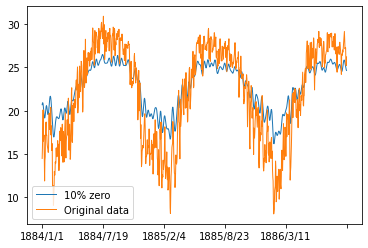

In [13]:
fig,ax = plt.subplots(1,1)
tick_spacing = 200
ax.plot(time[:1000],abs(ifft(zero_10_FC))[:1000],lw=1,label = "10% zero")
ax.plot(time[:1000],Mean_deg[:1000],lw=1,label = "Original data")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.legend()
plt.show()

**From the graph above, we can find that the plot become less fluctuating when I set the Fourier coefficients to zero.**

### (d)

In [14]:
zero_2_FC = fft(Mean_deg)
zero_2_FC[len(Mean_deg)//50:]=0

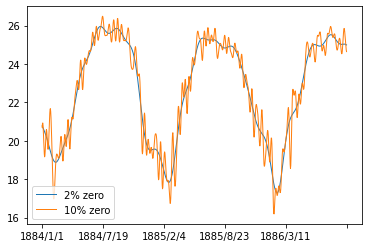

In [15]:
fig,ax = plt.subplots(1,1)
tick_spacing = 200
ax.plot(time[:1000],abs(ifft(zero_2_FC))[:1000],lw=1,label = "2% zero")
ax.plot(time[:1000],abs(ifft(zero_10_FC))[:1000],lw=1,label = "10% zero")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.legend()
plt.show()

**The graph becomes more smooth compared to the "lowest 10% zero"**

## 2

In [16]:
def h(n):
    if n==-1:
        return 1/2
    elif n==0:
        return 1
    elif n==1:
        return 1/2
    else:
        return 0

In [17]:
def g(t):
    if t==0:
        return 1
    elif t==3:
        return 2
    elif t==4:
        return 1
    else:
        return 0

### (a)

$y[n]=(g*h)[n]=\displaystyle\sum_{m=-\infty}^{\infty} g[n-m]h[m]$

In [18]:
def y(n):
    su = 0
    for m in range(5):
        su+=h(n-m)*g(m)
    return su

In [19]:
n = np.arange(-3,11)

In [20]:
Y_LC = [y(k) for k in n]

### (b)

$g_N[m]=\displaystyle\sum_{k=-\infty}^{\infty} g[m+kN]$

In [21]:
def gN(m,N):
    return g(m%N)

In [22]:
def y_cc(N,n):
    su = 0
    for m in range(-1,2):
        su+=gN(n-m,N)*h(m)
    return su

In [23]:
Y_CC = [y_cc(5,k) for k in n]

### (c)Draw 𝑦[𝑛] and 𝑦′[𝑛].

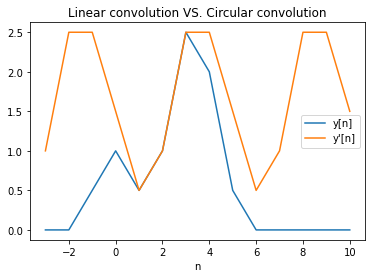

In [24]:
plt.plot(n,Y_LC,label = "y[n]")
plt.plot(n,Y_CC,label = "y'[n]")
plt.xlabel("n")
plt.title("Linear convolution VS. Circular convolution")
plt.legend()
plt.show()